# Binary Classification of Heart Disease of Patients using Deep Neural Network

### Suriya S (225229140)

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense


### 1.Load the dataset: “heart_data.csv” and explore the features

In [2]:
df = pd.read_csv("heart_data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.size

4242

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 2. Split the dataset for training and testing (test size = 20%)

In [10]:
y = df.pop('target')
X = df

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
X_train.shape

(242, 13)

In [13]:
X_test.shape

(61, 13)

### 3. Create a neural network based on the following requirements

* Input size = No. of features in X_train = 13
* No. of neurons/units in the Dense layer = 8, with Relu activation
function
* No. of neurons/units in output layer = 1, with sigmoid activation function

In [14]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. Compile your model with learning rate = 0.001, optimizer as ‘RMSprop’, Mean square error loss and metrics as ‘accuracy’.

In [15]:
optimizer = optimizers.RMSprop(learning_rate=0.001)

In [16]:
model.compile(loss = 'mse', optimizer = optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs =10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 4ms/step - loss: 0.4548 - accuracy: 0.5413
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.5496
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 10/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496


In [17]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 7ms/step - loss: 0.4754 - accuracy: 0.5246


[0.4754098355770111, 0.5245901346206665]

### 5. Print the summary of the model: model.summary()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 6. Train the model for 200 epochs and batch size as 10

In [19]:
model.compile(loss = 'mse', optimizer = optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs =200, batch_size=10, verbose=1)

Epoch 1/200
25/25 [==============================] - 1s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 8/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.5455
Epoch 9/200
25/25 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.5496
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 11/

In [20]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4754 - accuracy: 0.5246


[0.4754098355770111, 0.5245901346206665]

### 7. Save the trained model in a variable, such as, history. Also, you can split your training data for validation such as 20% of training data

In [21]:
history= model.fit(X_train,y_train,validation_split =0.2,epochs=100, batch_size =10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 22ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 8/1

### 8. Evaluate the trained model to predict the probability values for the test data set (ie., xtest and ytest)

In [22]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.4754 - accuracy: 0.5246


[0.4754098355770111, 0.5245901346206665]

### 9. Print the model accuracy and model loss as below (Use can use the ‘history’ object we have saved). Sample code is given below.

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

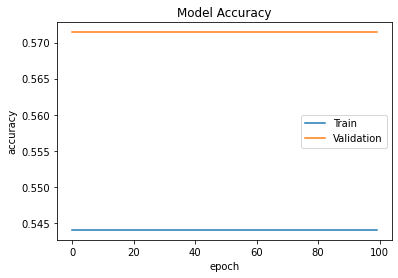

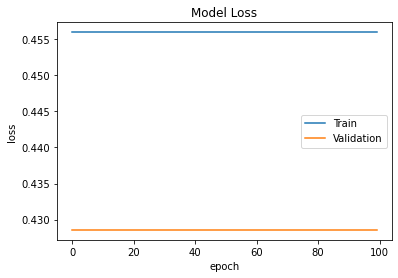

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 10. Do further experiments

In [25]:
model1 = Sequential()
model1.add(Dense(16, input_dim=13, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [26]:
model1.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 4ms/step - loss: 0.4204 - accuracy: 0.5620
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.6405
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.6198
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.6198
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.6198
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2728 - accuracy: 0.6322
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.6281
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.7066
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.6405
Epoch 10/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2487 - accuracy: 0.6240


In [27]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3772 - accuracy: 0.5246


[0.3771623969078064, 0.5245901346206665]

In [28]:
history1 = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 2/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.5440 - val_loss: 0.4286 - val_accuracy: 0.5714
Epoch 8/100

In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [30]:
ls = history1.history

In [31]:
new = pd.DataFrame.from_dict(ls)
new

,loss,accuracy,val_loss,val_accuracy
0,0.455959,0.544041,0.428571,0.571429
1,0.455959,0.544041,0.428571,0.571429
2,0.455959,0.544041,0.428571,0.571429
3,0.455959,0.544041,0.428571,0.571429
4,0.455959,0.544041,0.428571,0.571429
...,...,...,...,...
95,0.455959,0.544041,0.428571,0.571429
96,0.455959,0.544041,0.428571,0.571429
97,0.455959,0.544041,0.428571,0.571429
98,0.455959,0.544041,0.428571,0.571429


In [32]:
model2 = Sequential()
model2.add(Dense(32, input_dim=13, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [33]:
model2.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 2s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496
Epoch 10/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.5496


In [34]:
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4754 - accuracy: 0.5246


[0.4754098355770111, 0.5245901346206665]

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                448       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [36]:
model3 = Sequential()
model3.add(Dense(64, input_dim=13, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [37]:
model3.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 3s 5ms/step - loss: 0.4341 - accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.3162 - accuracy: 0.5579
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.6198
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.6529
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2326 - accuracy: 0.6529
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.2320 - accuracy: 0.6529
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2238 - accuracy: 0.6694
Epoch 8/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.6818
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.6322
Epoch 10/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.6488


In [38]:
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1846 - accuracy: 0.7377


[0.18456268310546875, 0.7377049326896667]

In [39]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________
